# Final Project Data Science and Machine Learning Course 2021 

1. Data Preparation

    Before we get started, let me explain a little bit about my final project. My final project is to predict how many days it is needed for each country to vaccinate their citizens to at least 80% of total population. The prediciton will be taken from the available data, will presummably predicted from the patterns of vaccinations (e.g Daily Vaccinations per hundred, thousands or million people). The data taken from healthdata.gov is a raw data that covers only from December 2020 to January 2021 (Vaccines availability in each country is different to the other, from it's shipping, registration or some still in Q's to get their hands-on to the vaccines)


In [3]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

- Import data

In [4]:
df = pd.read_csv('Country Vaccinations.csv')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Wales,NaN,2021-01-28,362970.0,362253.0,717.0,26225.0,21463.0,11.51,11.49,0.02,6807.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2060,Wales,NaN,2021-01-29,378950.0,378200.0,750.0,15980.0,19705.0,12.02,12.00,0.02,6250.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2061,Wales,NaN,2021-01-30,404249.0,403463.0,786.0,25299.0,19885.0,12.82,12.80,0.02,6307.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2062,Wales,NaN,2021-01-31,417147.0,416306.0,841.0,12898.0,20824.0,13.23,13.20,0.03,6605.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


- Rename other features to simplify



In [5]:
df.rename(columns= {'iso_code': 'Country Code', 'total_vaccinations': 'Total Vaccinations', 'people_vaccinated': 'Total People Vaccinated', 'people vaccinated' : 'People Vaccinated',
                   'people_fully_vaccinated': 'People vaccinated', 'daily_vaccinations_raw': 'Daily Vaccinations Raw', 'daily_vaccinations': 'Daily Vaccinations',
                   'total_vaccinations_per_hundred': 'Total 100', 'people_vaccinated_per_hundred': 'People Vaccinated 100', 'people_fully_vaccinated_per_hundred': 'People Vaccinated 100 (1)',
                   'Alcoholism': 'alcoholism', 'daily_vaccinations_per_million': 'Daily Vaccination 1 mio','vaccines': 'Vaccines', 'source_name':'Source','source_website':'Website'},
         inplace=True)
df

,country,Country Code,date,Total Vaccinations,Total People Vaccinated,People vaccinated,Daily Vaccinations Raw,Daily Vaccinations,Total 100,People Vaccinated 100,People Vaccinated 100 (1),Daily Vaccination 1 mio,Vaccines,Source,Website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Wales,NaN,2021-01-28,362970.0,362253.0,717.0,26225.0,21463.0,11.51,11.49,0.02,6807.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2060,Wales,NaN,2021-01-29,378950.0,378200.0,750.0,15980.0,19705.0,12.02,12.00,0.02,6250.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2061,Wales,NaN,2021-01-30,404249.0,403463.0,786.0,25299.0,19885.0,12.82,12.80,0.02,6307.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2062,Wales,NaN,2021-01-31,417147.0,416306.0,841.0,12898.0,20824.0,13.23,13.20,0.03,6605.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


- Check the shape of data

In [6]:
df.shape

(2064, 15)

- To check if there is missing values

In [7]:
df.isna().sum()

country                         0
Country Code                  206
date                            0
Total Vaccinations            699
Total People Vaccinated       996
People vaccinated            1488
Daily Vaccinations Raw        950
Daily Vaccinations             76
Total 100                     699
People Vaccinated 100         996
People Vaccinated 100 (1)    1488
Daily Vaccination 1 mio        76
Vaccines                        0
Source                          0
Website                         0
dtype: int64

There are many missing values in the data due to the lack of transparancy in some countries and slow vaccinations process

 - Check how many times countries USES WHICH variation of vaccine(s) in their country 

In [8]:
df['Vaccines'].value_counts().to_frame()


,Vaccines
Pfizer/BioNTech,970
"Moderna, Pfizer/BioNTech",503
"Oxford/AstraZeneca, Pfizer/BioNTech",241
"Pfizer/BioNTech, Sinopharm",70
Sputnik V,67
"CNBG, Sinovac",48
Sinovac,43
"Pfizer/BioNTech, Sinopharm, Sputnik V",26
"Oxford/AstraZeneca, Sinopharm",26
"Covaxin, Oxford/AstraZeneca",19


- Check how many days each country has done the vaccinations so far, we can assume how many times a country already done the vaccinations to the last date provided

In [9]:
df['country'].value_counts()

Northern Ireland    51
Scotland            51
Wales               51
China               48
Israel              46
                    ..
Morocco              5
Myanmar              2
Maldives             2
Algeria              2
Faeroe Islands       1
Name: country, Length: 72, dtype: int64

- Feature Description

In [10]:
feat = ["Name of Country",
          "Country's ISO Code",
          "Vaccination Period",
          "Total Number of Vaccinations",
          "Number of People Vaccinated",
          "Number of People Fully Vaccinated",
          "Number of Daily Vaccination (Approx.)",
          "Number of Daily Vaccination (Packed)",
          "Numver of Total Vaccinations per 100 ppl",
          "Number of People Vaccinated per 100 ppl",
          "Number of Ppl Fully Vaccinated per 100",
          "Number of Daily Vaccination per mio",
          "Name of Company of Vaccine",
          "Name of Source Taken",
          "Name Source's website"]

feature = pd.DataFrame(feat, columns=['Feature Description'])

In [11]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum())/len(df)*100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

df_desc = pd.DataFrame(desc, columns=['General Description', 'DataType', 'Data', '%Nan', 'Unique', 'Samples'])
df_desc = pd.concat([feature, df_desc], axis=1)
df_desc

,Feature Description,General Description,DataType,Data,%Nan,Unique,Samples
0,Name of Country,country,object,0,0.00,72,"[Morocco, Gibraltar]"
1,Country's ISO Code,Country Code,object,206,9.98,67,"[USA, GBR]"
2,Vaccination Period,date,object,0,0.00,52,"[2020-12-27, 2020-12-24]"
3,Total Number of Vaccinations,Total Vaccinations,float64,699,33.87,1330,"[1609072.0, 16233.0]"
4,Number of People Vaccinated,Total People Vaccinated,float64,996,48.26,1047,"[9807.0, 11744.0]"
5,Number of People Fully Vaccinated,People vaccinated,float64,1488,72.09,526,"[31397.0, 47137.0]"
6,Number of Daily Vaccination (Approx.),Daily Vaccinations Raw,float64,950,46.03,1064,"[99.0, 52057.0]"
7,Number of Daily Vaccination (Packed),Daily Vaccinations,float64,76,3.68,1648,"[2687.0, 87437.0]"
8,Numver of Total Vaccinations per 100 ppl,Total 100,float64,699,33.87,566,"[3.45, 0.4]"
9,Number of People Vaccinated per 100 ppl,People Vaccinated 100,float64,996,48.26,504,"[3.81, 0.93]"


- DataType Fixing

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

country                              object
Country Code                         object
date                         datetime64[ns]
Total Vaccinations                  float64
Total People Vaccinated             float64
People vaccinated                   float64
Daily Vaccinations Raw              float64
Daily Vaccinations                  float64
Total 100                           float64
People Vaccinated 100               float64
People Vaccinated 100 (1)           float64
Daily Vaccination 1 mio             float64
Vaccines                             object
Source                               object
Website                              object
dtype: object

 - Vaccination Period



In [13]:
print(f"Vaccinations date range: {df['date'].min()} - {df['date'].max()}")

Vaccinations date range: 2020-12-13 00:00:00 - 2021-02-02 00:00:00


Vaccination Period is different between countries, generally the data is taken from 2020-12-13 to 2021-02-02 from it's first vaccination date



- Number of Vaccines Being Used Daily for 30 days

In [14]:
dvac = df[(df['date'] >='2021-01-01') & (df['date'] <= '2021-01-30')]
dvac.head(100)

,country,Country Code,date,Total Vaccinations,Total People Vaccinated,People vaccinated,Daily Vaccinations Raw,Daily Vaccinations,Total 100,People Vaccinated 100,People Vaccinated 100 (1),Daily Vaccination 1 mio,Vaccines,Source,Website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Belgium,BEL,2021-01-07,14235.0,14235.0,NaN,8056.0,1921.0,0.12,0.12,NaN,166.0,"Moderna, Pfizer/BioNTech",Sciensano,https://datastudio.google.com/embed/u/0/report...
122,Belgium,BEL,2021-01-08,23371.0,23371.0,NaN,9136.0,3225.0,0.20,0.20,NaN,278.0,"Moderna, Pfizer/BioNTech",Sciensano,https://datastudio.google.com/embed/u/0/report...
123,Belgium,BEL,2021-01-09,26548.0,26548.0,NaN,3177.0,3679.0,0.23,0.23,NaN,317.0,"Moderna, Pfizer/BioNTech",Sciensano,https://datastudio.google.com/embed/u/0/report...
124,Belgium,BEL,2021-01-10,26943.0,26943.0,NaN,395.0,3735.0,0.23,0.23,NaN,322.0,"Moderna, Pfizer/BioNTech",Sciensano,https://datastudio.google.com/embed/u/0/report...


Data from 2021-1-01 to 2021-1-30

- Distribution of vaccines in the last 30 days

There are 62.112% of countries only have vaccinated their poeple within 30 days


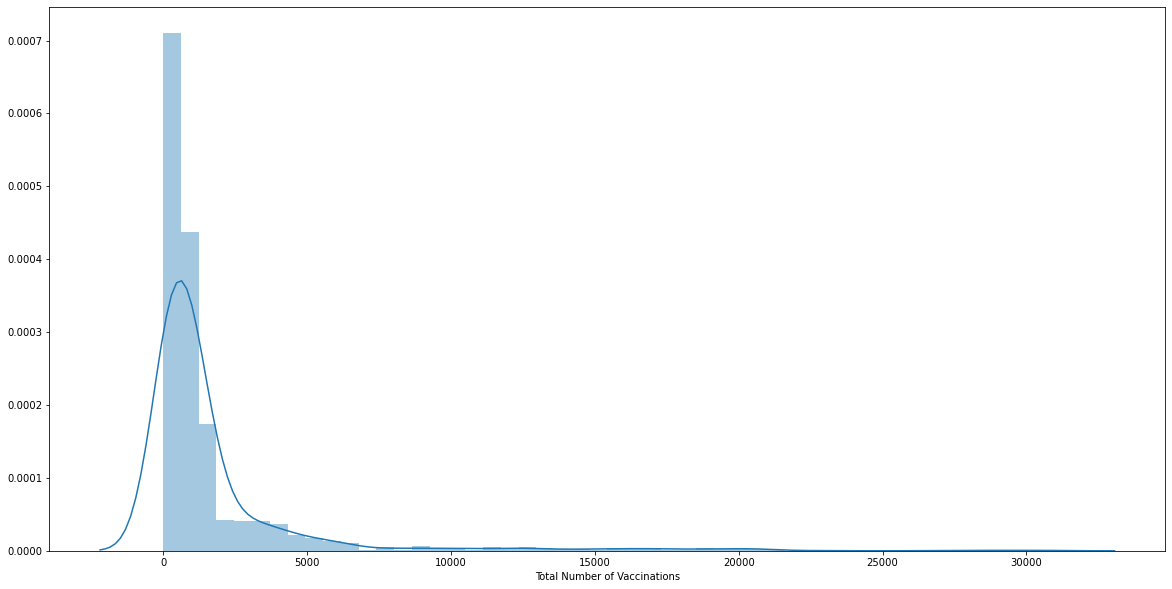

In [36]:
plt.figure(figsize=(20,10))
sns.distplot(df['Daily Vaccination 1 mio'])
plt.xlabel('Total Number of Vaccinations')
plt.ylabel(None)

print(f"There are {round(len(df[df['Daily Vaccination 1 mio']<=1000])/len(df)*100, 3)}% of countries only have vaccinated their poeple within 30 days")
plt.show()

There are 62% of countries have vaccinated their people within 30 days

- Statistic of Total Vaccinations

In [16]:
df['Total Vaccinations'].describe()

count    1.365000e+03
mean     9.424906e+05
std      3.061211e+06
min      0.000000e+00
25%      2.064900e+04
50%      1.075420e+05
75%      4.925290e+05
max      3.278086e+07
Name: Total Vaccinations, dtype: float64

- Statistic of People Vaccinated



In [17]:
df['Total People Vaccinated'].describe()

count    1.068000e+03
mean     9.863031e+05
std      2.949759e+06
min      0.000000e+00
25%      2.593050e+04
50%      1.287360e+05
75%      5.676445e+05
max      2.644084e+07
Name: Total People Vaccinated, dtype: float64

- Statistic of Daily Vaccinations

In [18]:
df['Daily Vaccinations'].describe()

count    1.988000e+03
mean     5.073531e+04
std      1.461559e+05
min      1.000000e+00
25%      1.357000e+03
50%      5.838000e+03
75%      2.586225e+04
max      1.355451e+06
Name: Daily Vaccinations, dtype: float64

- Statistic Total Vaccinations per 100 people

In [19]:
df['People Vaccinated 100'].describe()

count    1068.000000
mean        3.783315
std         6.608146
min         0.000000
25%         0.410000
50%         1.500000
75%         3.170000
max        38.510000
Name: People Vaccinated 100, dtype: float64

- Statistic of Daily Vaccinations per 1,000,000 people

In [20]:
df['Daily Vaccination 1 mio'].describe()

count     1988.000000
mean      1766.936117
std       3413.457979
min          0.000000
25%        289.500000
50%        782.500000
75%       1404.500000
max      30869.000000
Name: Daily Vaccination 1 mio, dtype: float64

- Bar Plot of Utilisation of Vaccine(s) Variant

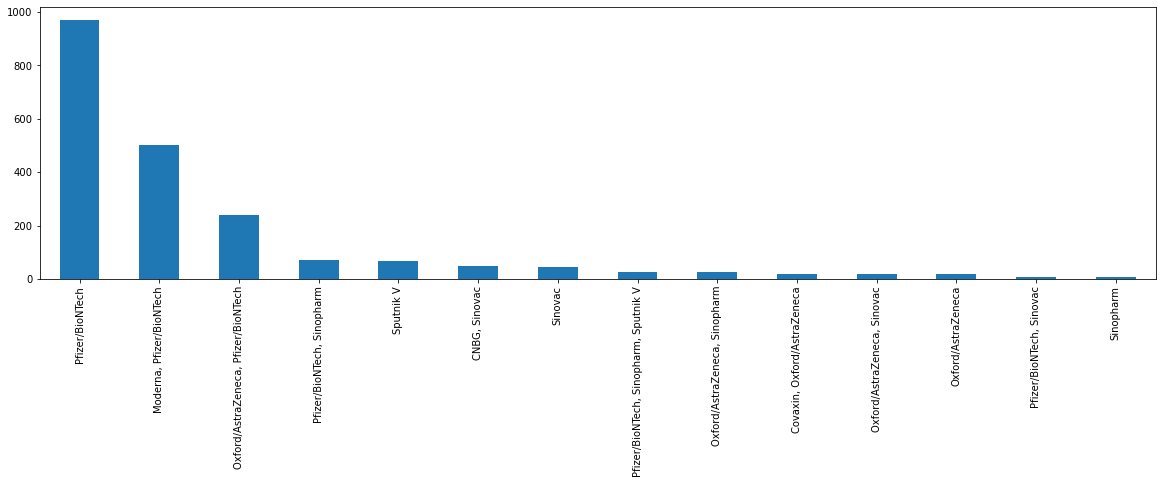

In [21]:
plt.figure(figsize=(20,5))
df['Vaccines'].value_counts().plot(kind="bar")
plt.show()

- Vaccine(s) Variant Utilised from 2020-12-14 to 2021-02-02 



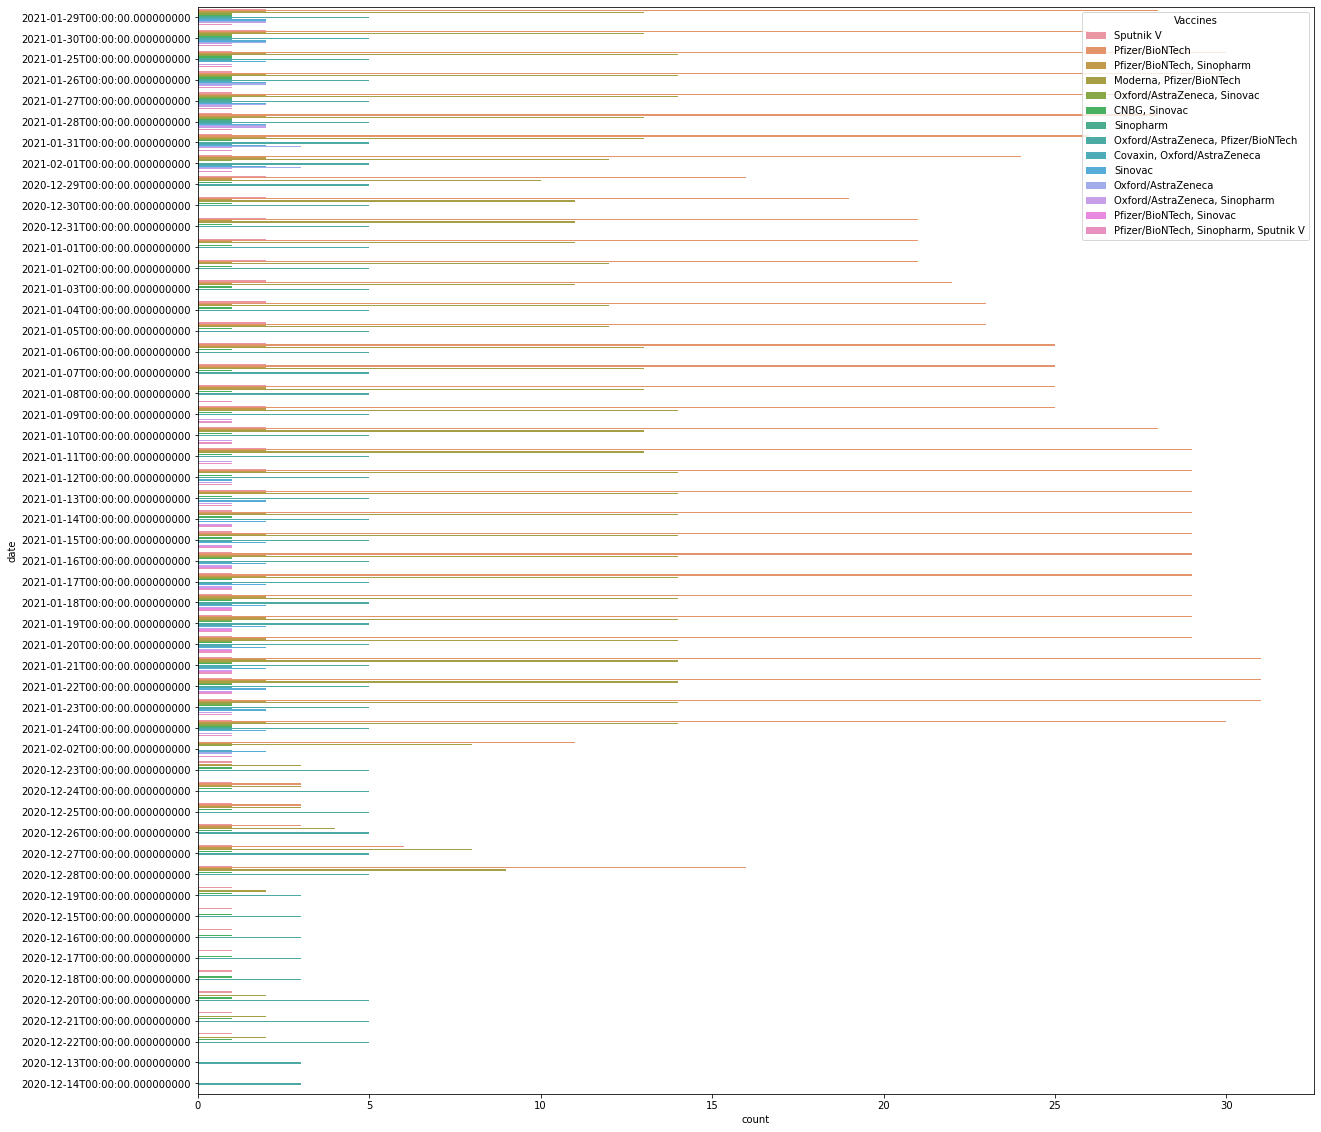

In [22]:
plt.figure(figsize=(20,20))
sns.countplot(y='date',hue='Vaccines', data=df)
plt.show()

- Vaccinations according to the Vaccine(s) Variant Utilised

In [23]:
dfvacc = df.groupby('Vaccines').mean()
dfvacc

,Total Vaccinations,Total People Vaccinated,People vaccinated,Daily Vaccinations Raw,Daily Vaccinations,Total 100,People Vaccinated 100,People Vaccinated 100 (1),Daily Vaccination 1 mio
Vaccines,,,,,,,,,
"CNBG, Sinovac",1.239529e+07,1.239529e+07,NaN,NaN,463709.042553,0.860000,0.860000,NaN,322.000000
"Covaxin, Oxford/AstraZeneca",1.916436e+06,NaN,NaN,229939.888889,219779.166667,0.138947,NaN,NaN,159.222222
"Moderna, Pfizer/BioNTech",1.740004e+06,1.569878e+06,516138.858696,103493.775811,86342.544330,4.434026,3.847444,1.686304,1976.647423
Oxford/AstraZeneca,3.613275e+04,NaN,NaN,17514.714286,16043.461538,0.157500,NaN,NaN,638.076923
"Oxford/AstraZeneca, Pfizer/BioNTech",2.201167e+06,2.036802e+06,182785.586207,142933.923077,71146.745763,7.456589,6.977209,0.532845,2508.855932
"Oxford/AstraZeneca, Sinopharm",3.625241e+04,NaN,NaN,14189.222222,8632.875000,12.041765,NaN,NaN,10869.583333
"Oxford/AstraZeneca, Sinovac",8.810312e+05,8.735424e+05,NaN,134855.941176,108224.176471,0.413889,0.410556,NaN,509.176471
Pfizer/BioNTech,1.353095e+05,1.539584e+05,20779.310638,11486.468627,7258.462607,2.053307,2.224500,0.270085,1290.563034
"Pfizer/BioNTech, Sinopharm",9.174214e+05,8.214845e+05,250000.000000,44439.450000,36294.205882,12.138594,11.359333,2.530000,4748.941176


- Percentage of Vaccine(s) Variant Utilised

In [24]:
df['Vaccines'].value_counts(normalize=True)

Pfizer/BioNTech                          0.469961
Moderna, Pfizer/BioNTech                 0.243702
Oxford/AstraZeneca, Pfizer/BioNTech      0.116764
Pfizer/BioNTech, Sinopharm               0.033915
Sputnik V                                0.032461
CNBG, Sinovac                            0.023256
Sinovac                                  0.020833
Pfizer/BioNTech, Sinopharm, Sputnik V    0.012597
Oxford/AstraZeneca, Sinopharm            0.012597
Covaxin, Oxford/AstraZeneca              0.009205
Oxford/AstraZeneca, Sinovac              0.008721
Oxford/AstraZeneca                       0.008236
Pfizer/BioNTech, Sinovac                 0.004360
Sinopharm                                0.003391
Name: Vaccines, dtype: float64

- Exporting Clean Data

In [25]:
df = df.replace(np.nan, 0)
df

,country,Country Code,date,Total Vaccinations,Total People Vaccinated,People vaccinated,Daily Vaccinations Raw,Daily Vaccinations,Total 100,People Vaccinated 100,People Vaccinated 100 (1),Daily Vaccination 1 mio,Vaccines,Source,Website
0,Algeria,DZA,2021-01-29,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,0.0,0.0,30.0,30.0,0.00,0.00,0.00,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,0.0,0.0,0.0,0.75,0.75,0.00,0.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,0.0,0.0,0.0,0.0,66.0,0.00,0.00,0.00,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,0.0,0.0,0.0,0.0,66.0,0.00,0.00,0.00,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,Wales,0,2021-01-28,362970.0,362253.0,717.0,26225.0,21463.0,11.51,11.49,0.02,6807.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2060,Wales,0,2021-01-29,378950.0,378200.0,750.0,15980.0,19705.0,12.02,12.00,0.02,6250.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2061,Wales,0,2021-01-30,404249.0,403463.0,786.0,25299.0,19885.0,12.82,12.80,0.02,6307.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2062,Wales,0,2021-01-31,417147.0,416306.0,841.0,12898.0,20824.0,13.23,13.20,0.03,6605.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [26]:
df.to_csv('01 - CVP.csv')